In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import util
import mylearn
import time
import seaborn as sns

np.random.seed(1)
data = pd.read_csv('train.csv')      # import data
House = data.copy()  #this gives us a new dataframe ot play with without deleting the actual data


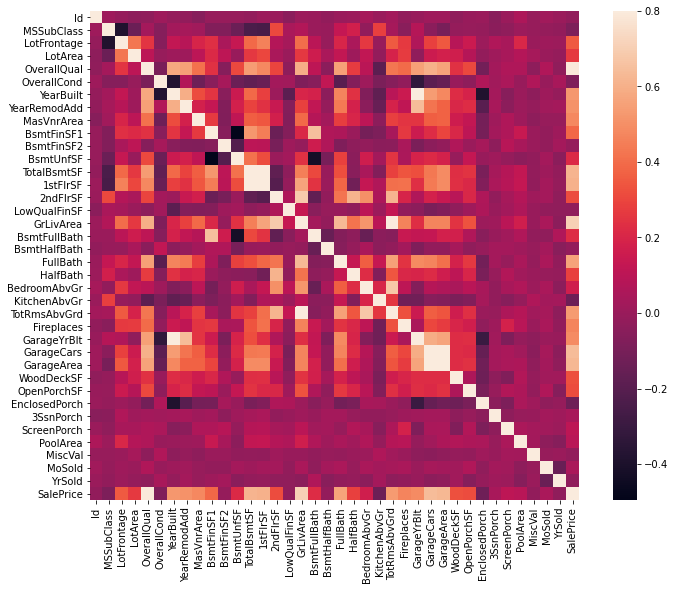

In [24]:
# generate heatmap
corrmat = House.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [25]:
# Remove column ID
House = House.drop('Id', axis = 1)

# drop the highly correlated feautures
House = House.drop(['1stFlrSF', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'], axis = 1)


In [26]:
# replace null values with 0
fillvals = {'LotFrontage': 0, 'MasVnrArea': 0 }  #creates fill values
House.fillna(value = fillvals, inplace = True)


In [27]:
# combine house age and year built
House['HouseAge']=2010 - House['YearBuilt']
House.drop('YearBuilt', axis =1, inplace = True)

# combine remodeled age and remodeled year

House['RemodAge']=2010 - House['YearRemodAdd']
House.drop('YearRemodAdd', axis =1, inplace = True)

# combine year sold and months sold
House['MonthsSold']= 12*(2010 - House['YrSold'])+(12-House['MoSold'])
House.drop(['YrSold', 'MoSold'], axis = 1, inplace = True)


In [28]:
# Categorical to Numerical 
House = pd.get_dummies(House)

# remove the unnecessary columns
s, f = House.shape
for col in House.columns:
    if np.max(House[col].value_counts()) >= s * 0.9:
        House = House.drop(col, axis=1)

In [29]:
# get the y value before categorization of sales price
Housetrain = np.array(House)
features = Housetrain[:, :-1]
output = Housetrain[:, -1]

In [30]:
# get rid of unnecessary columns
s, f = House.shape
for col in House.columns:
    if np.max(House[col].value_counts()) >= s * 0.9:
        House = House.drop(col, axis=1)
        

In [31]:
# classification of sales prices

def create_classes(dat, col = 'SalePrice'):#creates a definition that creates a class definition
    val = dat[col]
    if val < 100000: return 0
    elif val <150000: return 1
    elif val <200000: return 2
    elif val <250000: return 3
    else: return 4
    
House.apply(create_classes, axis = 1)
House['SaleClass']= House.apply(create_classes, axis = 1)

In [32]:
Housetrain = np.array(House)
xtrain = Housetrain[:, :-1]
ytrain = Housetrain[:, -1]

In [33]:
# Normalize the data
xtrain_normalized = util.normalize(xtrain, Te=None)

# perform PCA
E = mylearn.pca(xtrain_normalized, 0.15)   #keeps 36 columns
xtrain_np = np.dot(xtrain_normalized, E)


In [34]:
t0 = time.time()           # start time
y_kmean = mylearn.kmeans(xtrain_np, 5)
t1 = time.time()           # ending time
acc_i, acc_overall = util.accuracy_score(ytrain, y_kmean)
print(f'Overall accuracy for Kmeans = {acc_overall};')
print(f'Classwise accuracy for Kmeans = {acc_i};')
print(f'The Kmeans learning process takes {t1 - t0} seconds.')


Overall accuracy for Kmeans = 0.1589041095890411;
Classwise accuracy for Kmeans = [0.31578947 0.0259481  0.11219512 0.65238095 0.        ];
The Kmeans learning process takes 0.6455385684967041 seconds.


In [35]:
# try sklearn kmeans

from sklearn.cluster import KMeans

clf = KMeans(n_clusters=5, random_state=0).fit(xtrain_np)
predictions = clf.predict(xtrain_np)
acc_i, acc_overall = util.accuracy_score(ytrain, predictions)
print(f'Overall accuracy for Kmeans with sklearn = {acc_overall};')
print(f'Classwise accuracy for Kmeans wit sklearn = {acc_i};')
print(f'The Kmeans learning process takes {t1 - t0} seconds.')

Overall accuracy for Kmeans with sklearn = 0.25616438356164384;
Classwise accuracy for Kmeans wit sklearn = [0.37719298 0.03992016 0.11707317 0.62380952 0.58666667];
The Kmeans learning process takes 0.6455385684967041 seconds.


In [ ]:
# now with only numerical data

cats = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'HouseAge', 'RemodAge', 'MasVnrArea', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars','WoodDeckSF','OpenPorchSF', 
        'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MonthsSold']

